# Introduction

In 2022, over 100 million songs were uploaded to Spotify, almost 50,000 every single day. By October of 2022, this number was reported to have increased to almost 100,000 songs per day. Yet despite the saturation of the market, some artists and songs still manage to perform exceedlingly better than others. The Weekend's "Blinding Lights" with over 3.5 billion streams and Ed Sheeran's "Shape of You" with over 3.4 billion streams come to mind. But what sets these songs apart from the other  50,000 songs uploaded daily? This project explores the factors that contribute to the perfomance of a song on Spotify. We want to know which factors contribute the most to a song's ranking on Spotify. To that end, we will cycle through the entire data science life cycle from data collection, cleaning, analysis to machine learning and interpretation. 



## Why Is This Important?



Spotify is the most-used music streaming service with a market share of 31% (https://www.forbes.com/sites/eamonnforde/2022/01/19/spotify-comfortably-remains-the-biggest-streaming-service-despite-its-market-share-being-eaten-into/). With an increasingly saturated music market, and over 515 million monthly users, Spotify is an incredibly important platform for musicians to share their work. Consequentially, it will be paramount for musicians  to leverage whatever variables they can in order to stand out in this sea of uploads. Artists whose song have higher rankings maximize their earning potential on the platform. For example, Ed Sheeran's "Shape of You" earned over 6 million dollars as a result of its high ranking on Spotify ( see https://edm.com/industry/spotify-highest-earning-artists). Not optimizing for ranking could potentially mean leaving money on the table, for artists who are trying to make a living from music.  Besides the financial implications, artists can also increase their personal sense of creative fulfilment by reaching as wide an audience as possible. This is another incentive to understand exactly what factors make a song rise to the top of the Spotify charts. 



This research could potentially be important for Spotify as well given that hosting millions of songs each year might not always be sustainable. That there’s a rising cost associated with housing millions of tracks anually coupled with the fact that Spotify as a business has not generated any profit since its inception implies a great financial incentive for spotify to understand which songs will perfrom better, and consequetially generate more revenue. With this information, Spotify could potentially filter songs uploaded, and only hosts songs predicted to perform well on the platform. 



## More Resources

To learn more about about Spotify's business model and why they have operated at a net loss as well as the cost of hosting so much music, visit: https://www.concordiabusinessreview.com/post/why-is-spotify-not-generating-any-profit and https://www.rollingstone.com/pro/features/spotify-now-hosts-70-million-songs-but-it-cant-keep-that-up-forever-1094234/



To dive further into Spotify's growth in monthly uploads, visit: https://www.musicbusinessworldwide.com/over-60000-tracks-are-now-uploaded-to-spotify-daily-thats-nearly-one-per-second/





## Hypothesis
We will seek to identify the factors that most contribute to the ranking of a song on Spotify by looking through the Spotify Weekly Top 200 Songs Streaming Dataset. The independent variables we will analyze include the artist, song duration, liveness, valence, energy, loudness, tempo, danceability, number of streams, country and language. Our dependent variable will be a songs peak ranking

For an explanation of what each independent variable means and how it is calculated, visit: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

#### Our null hypothesis is there is no relationship between any of these factors and a song's peak ranking. 




# Part One: Data Collection
To begin, we gather our data using Python. We will be retrieving the data from the list of datasets avilable on Kaggle.com. Specifically, we will be 
looking at the Spotify Weekly Top 200 Songs dataset https://www.kaggle.com/datasets/yelexa/spotify200. This is a dataset of the top 200 songs on Spotify from 73 different countries  every week from April 14, 2022 till May 5, 2022. First we import the necesary Python libraries to begin

In [74]:
# standard Python libraries for data science
import numpy as np
import pandas as pd
import sklearn
import datetime
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Python libraries for data visualization
import matplotlib.pyplot as plt
import statsmodels.api
import statsmodels.formula.api as sm
import seaborn

Next, we download the dataset and read it as a dataframe.

In [2]:
# Import final.csv into a dataframe called final_df
weekly200_df = pd.read_csv('final.csv')



C:\Users\justi\AppData\Local\Temp\ipykernel_16292\1143093903.py:2: DtypeWarning: Columns (2,4,9,12,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,35) have mixed types. Specify dtype option on import or set low_memory=False.
  weekly200_df = pd.read_csv('final.csv')


In [3]:
#MATEUS TESTING MAY DELETE LATER
#C:\Users\mateu\OneDrive\Desktop\320final\finalproj (1).ipynb
# pd.options.display.max_columns = 23
# # weekly200_df.head()
# rows = week1.shape[0]
# # cols = weekly200_df.shape[1]

# print(rows)

# week1.head(3)

# Part Two: Data Cleaning
After collecting the data, we now move on to cleaning it up, making sure each column is correctly formated, dropping unneeded columns and handling any 
missing values.

In [4]:
# First we drop unneeded columns and keep only the columns which we want to analyze. 
weekly200_df = weekly200_df.drop(['Unnamed: 0', 'acousticness', 'speechiness', 'artist_id', 'collab', 'instrumentalness', 'artist_img', 'album_num_tracks', 'album_cover', 'mode', 'source','pivot', 'key'], axis=1)




In [5]:
# Next we reformat dates to datetime objects
weekly200_df['week'] = pd.to_datetime(weekly200_df['week'], errors='coerce', format='%Y-%m-%d')
weekly200_df['release_date'] = pd.to_datetime(weekly200_df['release_date'], errors='coerce', format='%Y-%m-%d')




Currently, we have over a million rows. This is because the data spans three weeks, from April 14 to May 5th 2022.   To further filter the data, we will group it by week. The data spans 3 weeks from April 14 to May 5 of 2022. It currently is an aggregate of each of the 73 countries's top 200 songs for all three weeks. . In order to be able to better understand this data, focus only on week one. We want to narrow our data to be more manageable so we will group it by week and analyze only the data from week one, from April 14th to April 21st. We will be left with the top 200 songs for 73 countries from April 14th to the 21st. 


In [6]:
# Select only songs that ranked within the top 200 in any of the 200 countries during week 1
mask = (weekly200_df['week'] >= '2022-04-14') & (weekly200_df['week'] < '2022-04-21')
week1 = weekly200_df.loc[mask]


Moreover, the dataset contains  lots of duplicate values. Currently, the table duplicates rows for songs that have more than one artist, creating a new row for each artist. We need to handle these duplictates. To do so, we will drop duplicate rows that have the same rank, country, uri and song name but different artist names.

In [7]:
# Next we drop duplicate rows
week1 = week1.drop_duplicates(subset=['country', 'uri', 'track_name', 'rank'])

Finally, we convert all the numeric values from strings to ints or floats. 

In [8]:
# Next we convert the numeric values to from objects to ints or floats
week1['rank'] = pd.to_numeric(week1['rank'])
week1['peak_rank'] = pd.to_numeric(week1['peak_rank'])
week1['tempo'] = pd.to_numeric(week1['tempo'])
week1['duration'] = pd.to_numeric(week1['duration'])
week1['liveness'] = pd.to_numeric(week1['liveness'])
week1['loudness'] = pd.to_numeric(week1['loudness'])
week1['energy'] = pd.to_numeric(week1['energy'])
week1['previous_rank'] = pd.to_numeric(week1['previous_rank'])
week1['danceability'] = pd.to_numeric(week1['danceability'])
week1['valence'] = pd.to_numeric(week1['valence'])
week1['streams'] = pd.to_numeric(week1['streams'])



In [9]:
#In this part, we convert duration from miliseconds to minutes


week1['duration'] = week1['duration'].apply(lambda x: (x/1000)/60)

#### This is our resulting table. It shows us 73 countries's top 200 songs for the week of April 14 - 21 2022

In [81]:
week1.head(5)

,uri,rank,artist_names,artists_num,artist_individual,artist_genre,track_name,release_date,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,loudness,liveness,valence,tempo,duration,country,region,language
0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,1,Paulo Londra,1.0,Paulo Londra,argentine hip hop,Plan A,2022-03-23,1,1,4,3003411,2022-04-14,0.583,0.834,-4.875,0.0658,0.557,173.935,2.970050,Argentina,South America,Spanish
1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,2,WOS,1.0,WOS,argentine indie,ARRANCARMELO,2022-04-06,2,129,2,2512175,2022-04-14,0.654,0.354,-7.358,0.1340,0.262,81.956,3.059117,Argentina,South America,Spanish
2,spotify:track:2SJZdZ5DLtlRosJ2xHJJJa,3,Paulo Londra,1.0,Paulo Londra,argentine hip hop,Chance,2022-04-06,3,59,2,2408983,2022-04-14,0.721,0.463,-9.483,0.0929,0.216,137.915,3.400050,Argentina,South America,Spanish
3,spotify:track:1O2pcBJGej0pmH2Y9XZMs6,5,Cris Mj,1.0,Cris Mj,urbano chileno,Una Noche en Medellín,2022-01-21,5,5,8,2080139,2022-04-14,0.870,0.548,-5.253,0.0534,0.832,96.018,2.562500,Argentina,South America,Spanish
4,spotify:track:1TpZKxGnHp37ohJRszTSiq,6,Emilia,1.0,Emilia,pop argentino,cuatro veinte,2022-03-24,6,9,3,1923270,2022-04-14,0.761,0.696,-3.817,0.1010,0.501,95.066,2.231583,Argentina,South America,Spanish


#  Part 3: Exploratory data analysis 
We can begin to make more sense of the data. We can group by specific countries and see that country's individual top 200 list for week 1.
Let's see the track names for Argentina's top 200 songs.  We see that the song Plan A by Paulo Londra is Argentina's top song, and also was last week according to the previous rank 

In [11]:
argentina = week1.loc[week1['country'] == "Argentina"].sort_values(by='rank')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
argentina.head(5)

#might delete later

,uri,rank,artist_names,artists_num,artist_individual,artist_genre,track_name,release_date,peak_rank,previous_rank,weeks_on_chart,streams,week,danceability,energy,loudness,liveness,valence,tempo,duration,country,region,language
0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,1,Paulo Londra,1.0,Paulo Londra,argentine hip hop,Plan A,2022-03-23,1,1,4,3003411,2022-04-14,0.583,0.834,-4.875,0.0658,0.557,173.935,2.970050,Argentina,South America,Spanish
1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,2,WOS,1.0,WOS,argentine indie,ARRANCARMELO,2022-04-06,2,129,2,2512175,2022-04-14,0.654,0.354,-7.358,0.1340,0.262,81.956,3.059117,Argentina,South America,Spanish
2,spotify:track:2SJZdZ5DLtlRosJ2xHJJJa,3,Paulo Londra,1.0,Paulo Londra,argentine hip hop,Chance,2022-04-06,3,59,2,2408983,2022-04-14,0.721,0.463,-9.483,0.0929,0.216,137.915,3.400050,Argentina,South America,Spanish
6699,spotify:track:6bQ5823aHmFVKLZW8E7rRo,4,"Duki, De La Ghetto, Quevedo",3.0,Duki,trap argentino,Si Quieren Frontear,2022-03-31,4,4,2,2168247,2022-04-14,0.789,0.837,-3.247,0.2090,0.476,81.536,3.338950,Argentina,South America,Spanish
3,spotify:track:1O2pcBJGej0pmH2Y9XZMs6,5,Cris Mj,1.0,Cris Mj,urbano chileno,Una Noche en Medellín,2022-01-21,5,5,8,2080139,2022-04-14,0.870,0.548,-5.253,0.0534,0.832,96.018,2.562500,Argentina,South America,Spanish


### Our Methodology

In order to get a better sense of what variables we might want to delve more into for later parts of our analysis, we will start off by making scatter plots and try to see if there is any trends in our data that directly influence the peak rank.

c:\Users\justi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


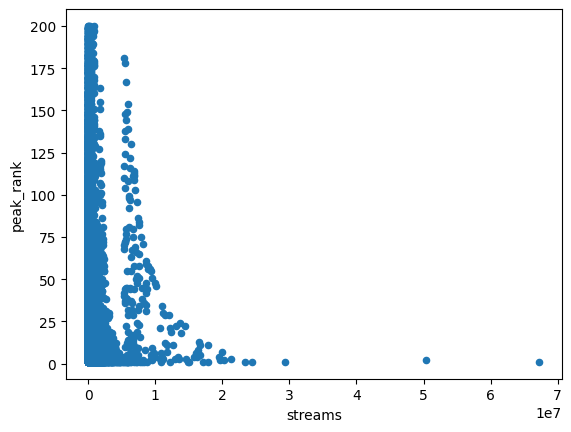

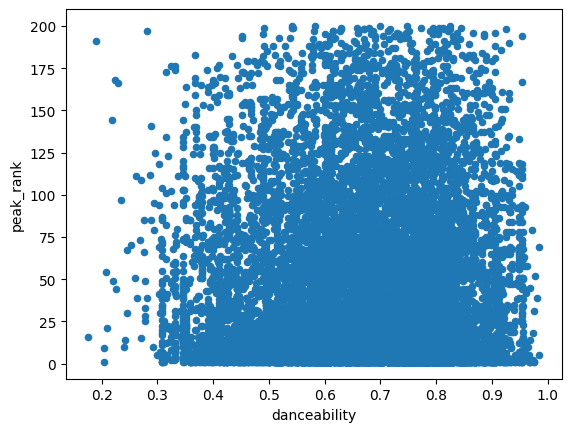

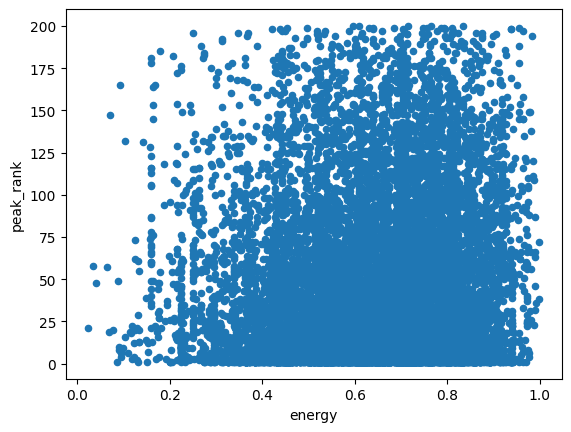

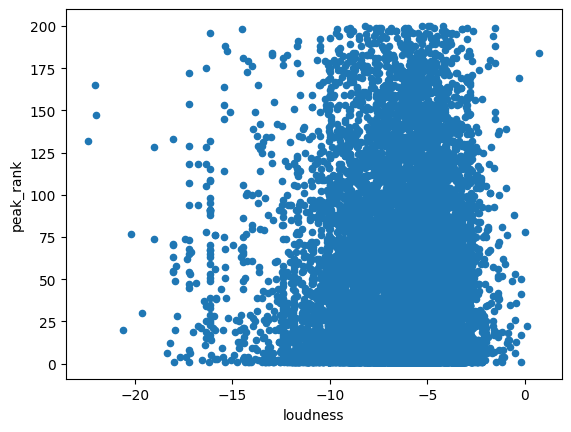

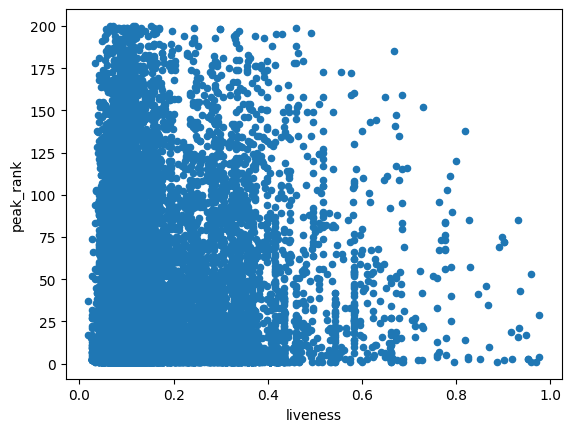

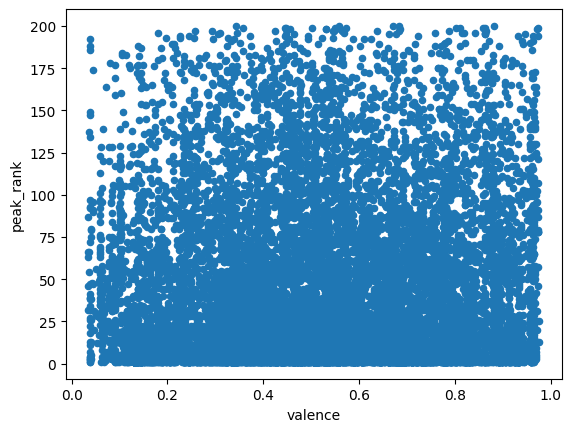

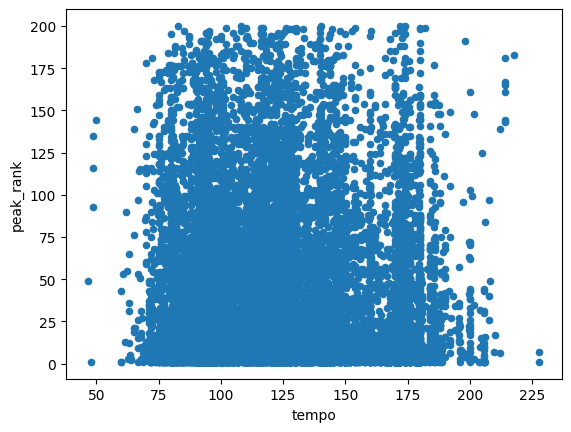

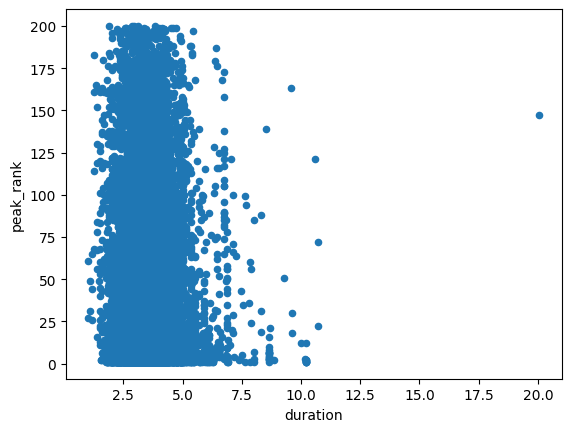

In [22]:
# independent_vars = ["uri","rank","artist_names","artists_num","artist_individual","artist_genre","track_name","release_date","peak_rank",	"previous_rank",	"weeks_on_chart",	"streams",	"week",	"danceability",	"energy",	"loudness",	"liveness",	"valence",	"tempo",	"duration",	"country",	"region",	"language"]

independent_vars = ["streams","danceability","energy","loudness","liveness","valence","tempo","duration"]

for independent_var in independent_vars:
    week1.plot.scatter(x=independent_var, y='peak_rank')
    # plt.show()



# week1.plot.scatter(x='energy', y='peak_rank')
# plt.show()

### What can we gather from these graphs

The independent variables we have chosen for the prior graphs are all independent variables that can classify as continuous variables. This was via scatter plot because data such as this are easier to plot. When working with static variables, the amount of possibilites can overwhelm a graph and are overall not the best to plot

Many of the plots above are noticabley random and have no real correlation that we can draw from. So based on these plots, we can say that factors such as valence, dancability, tempo, and energy by according to these graphs are not enough to draw a useful conclusion from.

If we were to infer any type of meaningful assumptions from these plots is that for most of these plots, songs that appear in the top 200 generally hover in the same domain when it comes to the independent variable. For example, when it comes to duration of a song, one can make the conclusion that a song is much more likely to be in the top 200 if that song has a duration between 2.5 minutes and 6 minutes.

### Another Approach

Since we couldn't get anything too meaningful from the first set of plots, we need to rework how we want to go about exploring this data. Taking a step back from the data and going based off intuition, different countries and regions listen to different music and what might be popular in one country might not be popular in another. So instead of checking the independent variables mentioned before in relation to the whole globe, I want to instead find out which countries combined have the most number of streams

In [13]:
#independent_vars = ["uri","rank","artist_names","artists_num","artist_individual","artist_genre","track_name","release_date","peak_rank",	"previous_rank",	"weeks_on_chart",	"streams",	"week",	"danceability",	"energy",	"loudness",	"liveness",	"valence",	"tempo",	"duration",	"country",	"region",	"language"]

distinct_regions = week1['region'].unique()

# get all 73 of the distinct countries in our dataframe
distinct_countries = week1['country'].unique()
countries_stream_count = {}

for country in distinct_countries:
    sum_x = week1.loc[week1['country'] == country, 'streams'].sum()
    countries_stream_count[country] = sum_x
    
#sorts countries from least to greatest number of streams
countries_stream_count = dict(sorted(countries_stream_count.items(), key = lambda x: x[1]))
print(countries_stream_count)


#for each of the 73 countries, I want to count how many songs show up under each country




{'Luxembourg': 1028587, 'Cyprus': 1186991, 'Iceland': 1573305, 'Estonia': 1669231, 'Bulgaria': 1981899, 'Latvia': 2009737, 'Lithuania': 2547479, 'Kazakhstan': 2657802, 'United Arab Emirates': 2911627, 'Saudi Arabia': 2959101, 'Belarus': 3091476, 'Nicaragua': 3167812, 'Morocco': 3643190, 'Egypt': 3845664, 'Slovakia': 4303902, 'Venezuela': 4731492, 'Panama': 5233071, 'Nigeria': 5261535, 'Honduras': 5432346, 'Korea': 5508108, 'Dominican Republic': 6389690, 'Romania': 6851389, 'Uruguay': 6902089, 'El Salvador': 7490195, 'Ukraine': 7692890, 'South Africa': 7863423, 'Bolivia': 8330709, 'Hungary': 9213523, 'Hong Kong': 9633277, 'Israel': 10570461, 'Costa Rica': 10852450, 'Austria': 11685190, 'Czech Republic': 12591872, 'Paraguay': 12690976, 'Switzerland': 13820956, 'New Zealand': 13941613, 'Singapore': 15019407, 'Greece': 15099768, 'Ireland': 15286844, 'Finland': 16267159, 'Vietnam': 16280336, 'Guatemala': 16330494, 'Portugal': 17080724, 'Ecuador': 17436741, 'Taiwan': 18271669, 'Belgium': 186

Using the data from above, I can tell that the top 10 countries in terms of spotify streams are the United States, Brazil, Mexico, India, Germany, Spain, Italy, United Kingdom, Indonesia, Turkey. We can use this to make inferences on data later. 

Later on idk how yet but i'm going to find the most popular song and make some graphs on that 

### Case Study

For this next part, we are going to take a song that is popular in many different countries and see how that one song performs differently in each country. In order to find this song we are going to count which track song in our data frame appears the most times.


In [14]:
#The variable counts is an array of all song track names. The array is ordered from most track names that have the
#most appearances in all the different countries
counts = week1['track_name'].value_counts()
print(counts.index[0])

As It Was


'As It Was' by Harry Styles was the most popular song this week on spotify. Therefore, it will be perfect for us to use in order to test out how it performed in different countries.

Let us start off by graphing it's popularity in different countries. Since 73 countries is a little too much to put all on one graph, we will be looking at the 10 countries stated earlier with the most spotify streams.

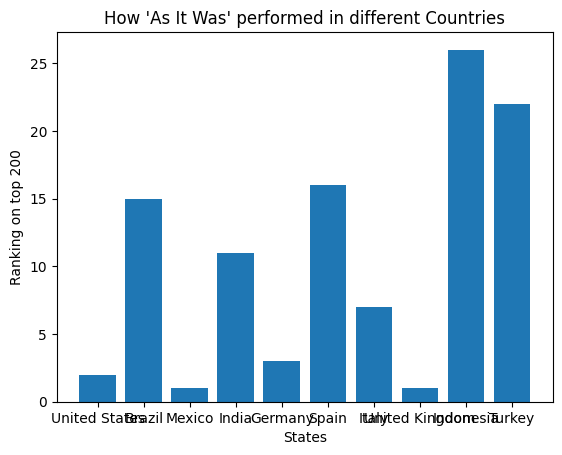

In [15]:
countries = ["United States", "Brazil", "Mexico", "India", "Germany", "Spain", "Italy", "United Kingdom", "Indonesia", "Turkey"]
asItWasRankings ={}
for country in countries:
    #put it in a try and catch block just in case for one of these countries, as it was is not part of the top 200
    try:
        ranking = week1.loc[(week1["track_name"] == 'As It Was') & (week1["country"] == country), 'rank'].iloc[0]
    except Exception as e:
        ranking = 300

    asItWasRankings[country] = ranking


labels = list(asItWasRankings.keys())
values = list(asItWasRankings.values())

# create a bar chart using the data
plt.bar(labels, values)

# add title and axis labels
plt.title("How 'As It Was' performed in different Countries")
plt.xlabel('States')
plt.ylabel('Ranking on top 200')

# display the chart
plt.show()



### Analysis

As we can see, 'As It Was' performed well. I'm out of ideas rn but I'll come back with some heat ;)

### Linear Regression

Now we will perform a linear regression on the data to see if we can find any meaningful relationships between the independent variables and the peak rank. We will be using the statsmodels library to perform the regression.

In [30]:
independent_vars = ["streams", "danceability", "energy", "loudness", "liveness", "valence", "tempo", "duration"]
r2s = {}

# Perform linear regression for danceability vs peak_rank
for var in independent_vars:
    results = sm.ols(formula=f"peak_rank ~ {var}", data=week1).fit()
    r2s[var] = results

# Print the summary for each regression
for var, results in r2s.items():
    print(f"Regression for {var}")
    print(results.summary())

Regression for streams
                            OLS Regression Results                            
Dep. Variable:              peak_rank   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     80.63
Date:                Wed, 10 May 2023   Prob (F-statistic):           3.05e-19
Time:                        19:49:49   Log-Likelihood:                -76763.
No. Observations:               14599   AIC:                         1.535e+05
Df Residuals:                   14597   BIC:                         1.535e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.3069      0.

This is a large section of output, so now we are going to just look at the R^2 values to see if we have a good model with any of the independent variables.

In [26]:
independent_vars = ["streams", "danceability", "energy", "loudness", "liveness", "valence", "tempo", "duration"]
r2s = {}

# Perform linear regression for danceability vs peak_rank
for var in independent_vars:
    results = sm.ols(formula=f"peak_rank ~ {var}", data=week1).fit()
    r2s[var] = results.rsquared

# Print the r2 values for each variable sorted highest to lowest
print("R2 values for each variable sorted highest to lowest: ")
for el in (sorted(r2s.items(), key=lambda x: x[1], reverse=True)):
    print(el)

R2 values for each variable sorted highest to lowest: 
('streams', 0.005493466249595791)
('duration', 0.0029969156206094416)
('tempo', 0.0017623243673229316)
('danceability', 0.0016586166275230907)
('loudness', 0.0010056701368459375)
('energy', 0.0009907550862345849)
('liveness', 0.0002275595026863808)
('valence', 8.420542040887824e-05)


The provided code aims to investigate the correlation between several independent variables and the peak rank a song achieves. The independent variables considered are streams, danceability, energy, loudness, liveness, valence, tempo, and duration. The code first initializes an empty dictionary called r2s to store R-squared values for each independent variable. It then iterates through each variable, performing a linear regression between the variable and peak rank using the Ordinary Least Squares (OLS) method. The R-squared value, which indicates the proportion of the variance in the dependent variable (peak rank) that is predictable from the independent variable, is calculated and stored in the r2s dictionary. Finally, the code prints the R-squared values sorted from highest to lowest.

The results show that all independent variables have R-squared values less than 0.005, which implies a very weak correlation between these variables and the peak rank of a song. This indicates that these variables are not good predictors of a song's peak rank and that other factors might be more influential in determining the song's success. A low R-squared value suggests that the variability in peak rank cannot be well-explained by the selected independent variables, and further analysis or inclusion of additional variables may be necessary to better understand the factors that contribute to a song's peak rank.



Now we will perform an exponential regression for each of the independent variables and see if we can find any meaningful relationships between the independent variables and the peak rank.

In [42]:
independent_vars = ["streams", "danceability", "energy", "loudness", "liveness", "valence", "tempo", "duration"]
r2s = {}

# Add a new column with the natural logarithm of peak_rank
week1['log_peak_rank'] = np.log(week1['peak_rank'])

# Perform exponential regression for each independent variable vs log_peak_rank
for var in independent_vars:
    results = sm.ols(formula=f"log_peak_rank ~ {var}", data=week1).fit()
    r2s[var] = results.rsquared

# Print the r2 values for each variable sorted highest to lowest with a new line between each variable
print("(Exponential) R2 values for each variable sorted highest to lowest: ")
for el in (sorted(r2s.items(), key=lambda x: x[1], reverse=True)):
    print(el)

week1 = week1.drop(columns=['log_peak_rank'])

(Exponential) R2 values for each variable sorted highest to lowest: 
('streams', 0.007496031745549692)
('tempo', 0.003870009734764146)
('danceability', 0.0032621793693833334)
('loudness', 0.0016772022512436813)
('duration', 0.0008643655048854448)
('energy', 0.0005801125736127899)
('liveness', 0.0005715069694908204)
('valence', 4.873211923994702e-07)


Now we perform an exponential regression by taking the natural logarithm of the peak rank and adding it as a new column, log_peak_rank, in the week1 dataset. The linear regression is then executed between each independent variable and the log_peak_rank. The R-squared values from this exponential regression show a slight improvement, with the highest value now being 0.0075. However, many values still remain under 0.005, which suggests that the correlation between the independent variables and the natural logarithm of the peak rank remains weak.




Now we will attempt to find a combination of variables that produces a better R^2 value than the individual variables.

In [37]:
from itertools import combinations
#loop through independent vars and find the r2 value for each different combination of independent variables
independent_vars = ["streams", "danceability", "energy", "loudness", "liveness", "valence", "tempo", "duration"]
r2s = {}
for i in range(1, len(independent_vars) + 1):
    for combo in combinations(independent_vars, i):
        formula = "peak_rank ~ "
        for var in combo:
            formula += var + " + "
        formula = formula[:-3]
        results = sm.ols(formula=formula, data=week1).fit()
        r2s[combo] = results.rsquared

print("R2 values for each variable sorted highest to lowest: ")
x = 0
for el in (sorted(r2s.items(), key=lambda x: x[1], reverse=True)):
    print(el)
    if x == 10:
        break
    x += 1

R2 values for each variable sorted highest to lowest: 
(('streams', 'danceability', 'energy', 'loudness', 'liveness', 'valence', 'tempo', 'duration'), 0.01912259904157454)
(('streams', 'danceability', 'energy', 'loudness', 'valence', 'tempo', 'duration'), 0.019108956118567)
(('streams', 'danceability', 'energy', 'loudness', 'liveness', 'tempo', 'duration'), 0.018508384982214965)
(('streams', 'danceability', 'energy', 'loudness', 'tempo', 'duration'), 0.01848119050641195)
(('streams', 'danceability', 'energy', 'loudness', 'liveness', 'valence', 'tempo'), 0.017212018133912377)
(('streams', 'danceability', 'energy', 'loudness', 'valence', 'tempo'), 0.017209867278095925)
(('streams', 'danceability', 'energy', 'loudness', 'liveness', 'tempo'), 0.01663232844599949)
(('streams', 'danceability', 'energy', 'loudness', 'tempo'), 0.016623550664528253)
(('streams', 'energy', 'loudness', 'liveness', 'valence', 'tempo', 'duration'), 0.01650476165466197)
(('streams', 'energy', 'loudness', 'liveness',

Now we aim to explore the relationship between the peak rank and all possible combinations of the independent variables to find the best model with the highest R-squared value. To achieve this, the code uses the combinations function from the itertools module to generate all subsets of independent variables, ranging from a single variable to the entire set.

For each subset of independent variables, the code constructs a formula to perform a linear regression using the Ordinary Least Squares (OLS) method. It then fits the model with the given formula, calculates the R-squared value for the combination, and stores it in the r2s dictionary, using the combination of independent variables as the key.

After processing all combinations, the code prints the top 10 R-squared values sorted from highest to lowest. We see the best R-squared value is with the formula contain all independent variables together. The R-squared values are now between 0.016 and 0.019, which indicates a significant improvement in the model's ability to predict the peak rank compared to the previous linear and exponential regression models. However, these R-squared values are still relatively low, suggesting that the models are not particularly strong predictors of a song's peak rank. Further investigation, refinement of the models, or inclusion of additional variables may be necessary to develop a better predictive model for a song's success.



Now we will see if subtracting or multiplying one of the independent variables in the formula makes a difference in the R^2 value.

In [38]:
from itertools import combinations, product

# loop through independent vars and find the r2 value for each different combination of independent variables
independent_vars = ["streams", "danceability", "energy", "loudness", "liveness", "valence", "tempo", "duration"]
r2s = {}

for i in range(1, len(independent_vars) + 1):
    for combo in combinations(independent_vars, i):
        # Generate all possible combinations of add and subtract operations
        operations = list(product([" + ", " - "], repeat=len(combo)-1))
        for op_combo in operations:
            formula = "peak_rank ~ " + combo[0]
            for idx, var in enumerate(combo[1:]):
                formula += op_combo[idx] + var
            results = sm.ols(formula=formula, data=week1).fit()
            r2s[(formula,)] = results.rsquared

print("R2 values for each variable sorted highest to lowest: ")
x = 0
for el in (sorted(r2s.items(), key=lambda x: x[1], reverse=True)):
    print(el)
    if x == 10:
        break
    x += 1


R2 values for each variable sorted highest to lowest: 
(('peak_rank ~ streams + danceability + energy + loudness + liveness + valence + tempo + duration',), 0.01912259904157454)
(('peak_rank ~ streams + danceability + energy + loudness + valence + tempo + duration',), 0.019108956118567)
(('peak_rank ~ streams + danceability + energy + loudness - liveness + valence + tempo + duration',), 0.019108956118567)
(('peak_rank ~ streams + danceability + energy + loudness + liveness + tempo + duration',), 0.018508384982214965)
(('peak_rank ~ streams + danceability + energy + loudness + liveness - valence + tempo + duration',), 0.018508384982214965)
(('peak_rank ~ streams + danceability + energy + loudness + tempo + duration',), 0.01848119050641195)
(('peak_rank ~ streams + danceability + energy + loudness - liveness + tempo + duration',), 0.01848119050641195)
(('peak_rank ~ streams + danceability + energy + loudness - valence + tempo + duration',), 0.01848119050641195)
(('peak_rank ~ streams + d

Now we aim to explore the relationship between the peak rank and all possible combinations of independent variables, including addition and subtraction operations. Now we use the product function generates all possible combinations of add and subtract operations between the variables in each combination.

The R-squared values are now in the range of 0.017 to 0.019, which is similar to the previous results. However, 8 out of the top 10 R-squared values are above 0.018, indicating that some better formulas were discovered using both addition and subtraction operations together. This suggests that considering different combinations of operations between independent variables can help in identifying stronger predictive models, although the overall improvement in R-squared values is still relatively modest.



Now we will see the impact each independent variable has on the peak rank.

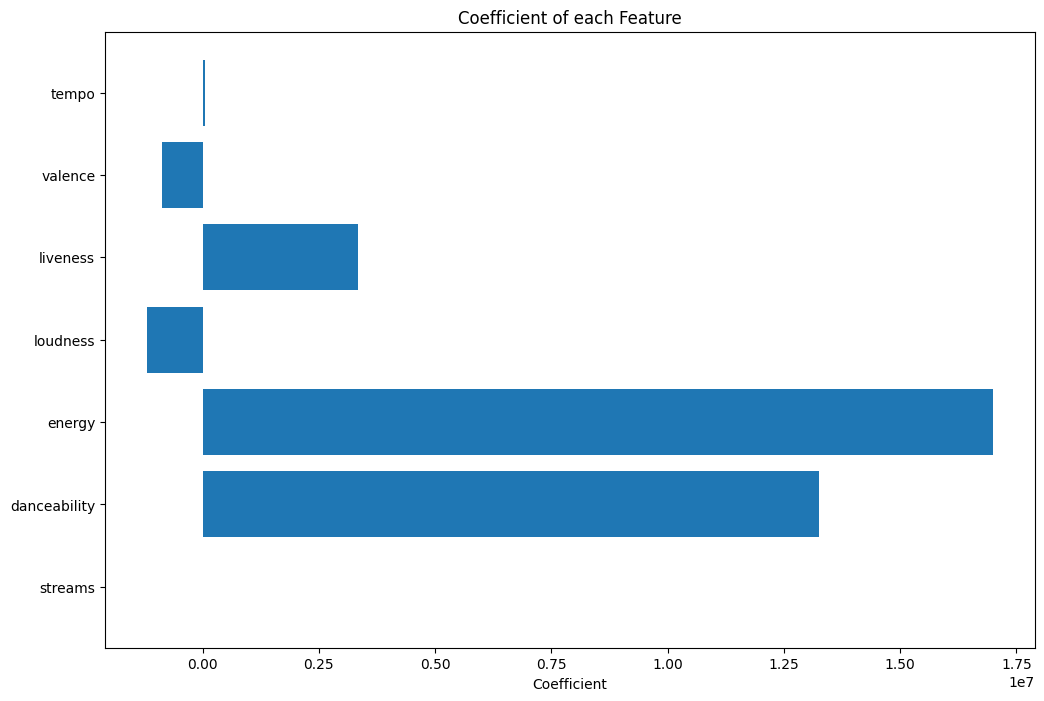

In [78]:
#drop all columns that are not int64 or float64
only_num = week1.select_dtypes(include=['int64', 'float64']).drop(columns=['previous_rank', 'rank'])

X = only_num.values[:, 1:-1]
#remove NaN from X
X = np.nan_to_num(X)
y = only_num.values[:, -1].astype(int)

# use linear regression to fit the data
reg = linear_model.LinearRegression().fit(X, y)

# set plot size and labels
plt.figure(figsize=(12, 8))
plt.title('Coefficient of each Feature')
plt.xlabel('Coefficient')

# create horizontal bar graph with features on the y-axis and the coefficient of each feature as the width
plt.barh(y=only_num.columns[1:-1], width=reg.coef_)
plt.show()

We can see that almost every variable (except for loudness and valence) have a positive impact on peak rank, which doesn't tell us too much, but we can now more clearly see that energy and danceability have the most positive impact on peak rank.



In order to delve deeper into the data analysis, we can determine the significance of each feature. Feature importances reveal the degree of usefulness of individual features in contributing to the accuracy of a model. The bar graph presented below displays the feature importance, as determined by a random forest classifier.

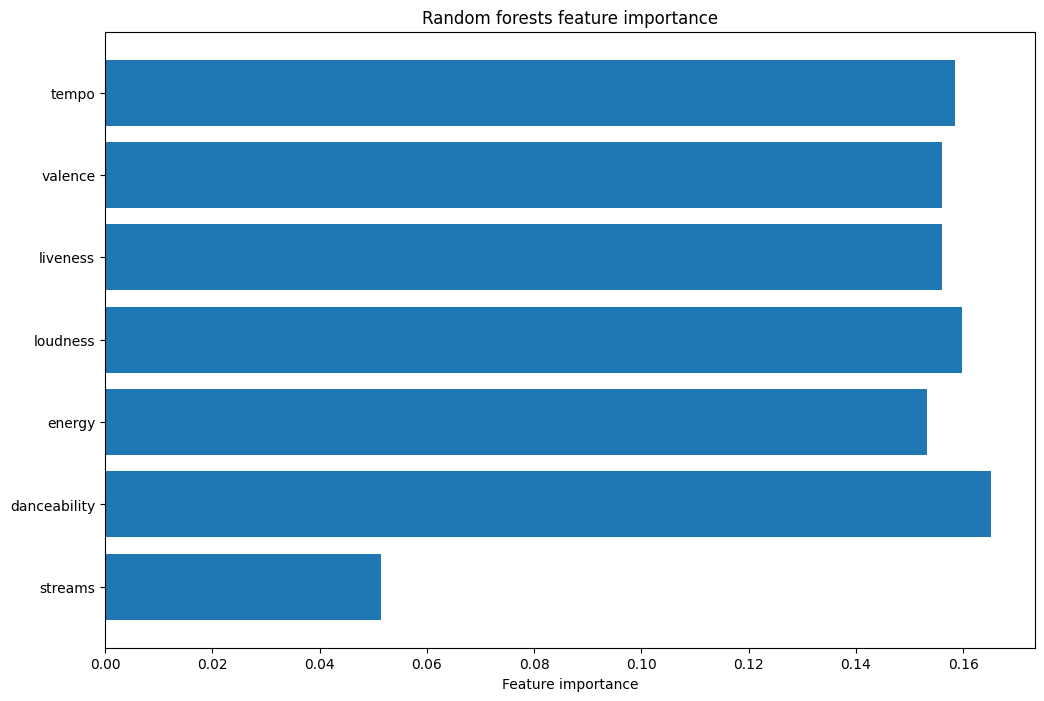

In [80]:
#drop all columns that are not int64 or float64
only_num = week1.select_dtypes(include=['int64', 'float64']).drop(columns=['previous_rank', 'rank'])

X = only_num.values[:, 1:-1]
#remove NaN from X
X = np.nan_to_num(X)
y = only_num.values[:, -1].astype(int)

clf = RandomForestClassifier(n_estimators=100, criterion="gini")
clf = clf.fit(X, y)

# set plot size and labels
plt.figure(figsize=(12, 8))
plt.title('Random forests feature importance')
plt.xlabel('Feature importance')

# create horizontal bar graph with features on the y-axis and the importance of each feature as the width
plt.barh(y=only_num.columns[1:-1], width=clf.feature_importances_)
plt.show()

From the chart above, we see that danceability is the most important feature. It is followed closely by loudness, tempo. Then valence and liveness are tied with energy right behind them. And finally, by a significant margin streams is the least important feature.


Now we will examine if the country has an impact on what the most important independent variables are.

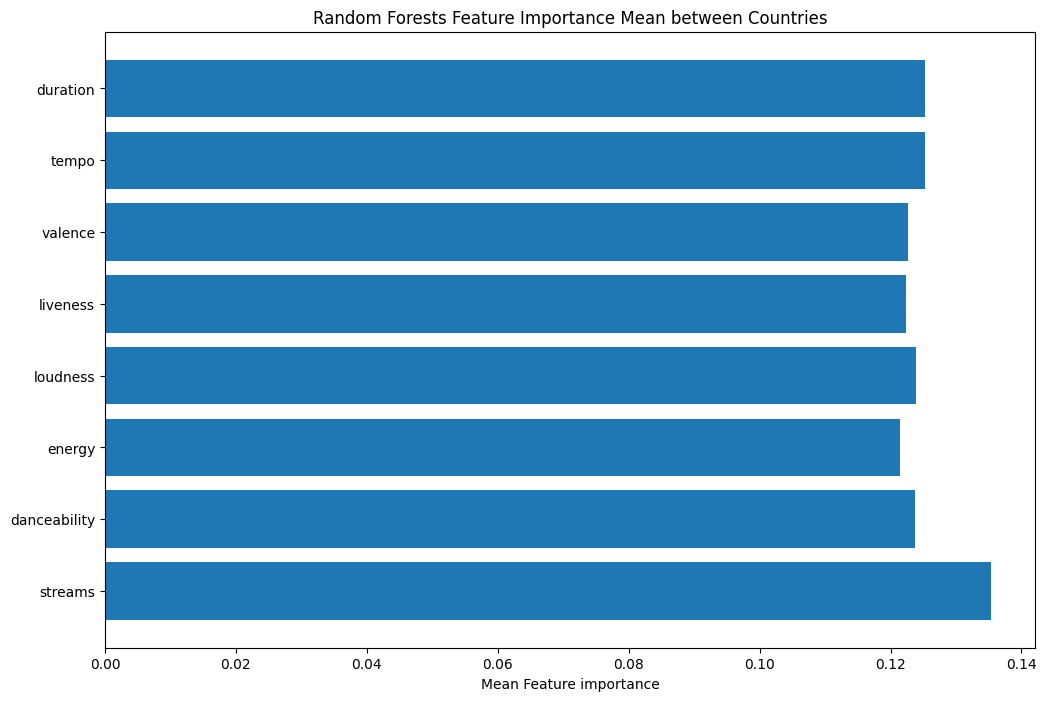

In [76]:
# print(len(week1['country'].unique()))

# generate an empty 2D numpy array for every country (183 of them) with space for every feature and the name of the
# country (11 total)
importances = np.empty((73, 8))
i = 0

#drop all columns that are not int64 or float64
only_num = week1.select_dtypes(include=['int64', 'float64']).drop(columns=['previous_rank', 'rank'])

#add the country column back in
only_num['country'] = week1['country']
# print(only_num.tail())
# print(only_num.dtypes)

# iterates through every country once
for country in only_num['country'].unique():
    
    # get the features and the life expectancy data for the country for all 17 years
    X = only_num[only_num['country'] == country].values[:, 1:-1]
    #remove NaN from X
    X = np.nan_to_num(X)
    #replace missing values in X
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    y = only_num[only_num['country'] == country].values[:, 0].astype(int)
    
    # using random forest classification to get feature importances
    clf = RandomForestClassifier(n_estimators=100, criterion="gini")
    clf = clf.fit(X, y)
    
    # put the importance of each of this country's features into a row of the 2D numpy array
    importances[i] = clf.feature_importances_
    i += 1

# used for calculating the mean importance for every feature
mean_importances = []

# Runs 11 times, once for every feature, and calculates the mean
for i in range(8):
    mean_importances.append(importances[:, i].mean())

# set plot size and labels
plt.figure(figsize=(12, 8))
plt.title('Random Forests Feature Importance Mean between Countries')
plt.xlabel('Mean Feature importance')

# create horizontal bar graph with features on the y-axis and the importance of each feature as the width
plt.barh(y=only_num.columns[1:-1], width=mean_importances)
plt.show()